In [350]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler

In [3]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [7]:
train = train.drop('id', axis=1)

In [11]:
y = train['target']
X = train.iloc[:,1:]

C:\Users\kexu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kexu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


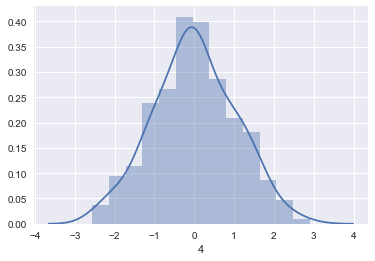

In [17]:
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(X['4'])

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=10)
selected_features = selector.fit_transform(X, y)


In [302]:
f_score_indexes = (-selector.scores_).argsort()[:50]

In [303]:
f_score_indexes.sort()

In [304]:
X1 = X.iloc[:,f_score_indexes]

In [305]:
X1.head()

,0,4,13,16,17,24,30,33,39,43,...,237,239,244,252,258,272,276,289,295,298
0,-0.098,1.309,0.102,0.177,-0.673,1.763,1.125,0.385,0.005,0.579,...,0.966,-0.181,0.074,0.754,-0.516,-1.516,0.820,0.569,-2.097,1.038
1,1.081,-0.428,1.540,1.098,-0.237,-1.519,-0.227,-2.721,-0.303,-1.320,...,-2.254,0.366,-1.160,0.960,0.630,-0.516,2.064,-0.612,-1.624,-0.936
2,-0.523,-0.022,0.352,-1.044,0.270,1.786,-2.032,0.924,1.920,1.088,...,-1.234,-0.010,2.342,0.678,1.459,0.346,-0.208,0.202,-1.165,0.800
3,0.067,-0.446,-1.010,0.210,0.836,0.365,0.999,0.394,-2.241,0.423,...,0.054,0.507,1.176,-0.497,0.530,2.725,1.527,-1.618,0.467,-0.533
4,2.347,1.225,1.478,-1.312,-0.322,0.024,-0.308,0.037,-0.122,-0.318,...,0.159,0.024,-0.233,-0.191,-0.906,-0.464,-0.523,1.845,1.378,0.428


In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.33, random_state=42)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=40)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='uniform')

In [89]:
pred = neigh.predict_proba(X_test)[:,1]

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.875620347394541

In [91]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
predgnb = gnb.predict_proba(X_test)[:,1]

In [94]:
roc_auc_score(y_test, predgnb)

0.9416873449131513

In [306]:
test = pd.read_csv('test.csv')

In [307]:
test.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [308]:
test= test.drop('id',axis=1)
test = test.iloc[:,f_score_indexes]

In [100]:
result1  = gnb.predict_proba(test)[:,1]

In [105]:
result2 = neigh.predict_proba(test)[:,1]

In [106]:
result['target'] = (result2+result1)/2

In [107]:
result.head()

,id,target
0,250,0.750298
1,251,0.816598
2,252,0.747260
3,253,0.899977
4,254,0.781184


In [108]:
result.to_csv('submission2.csv', index = False)

In [115]:
from sklearn.svm import SVC
clf = SVC(gamma='auto',probability=True)
clf.fit(X_train, y_train)
predsvc = clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, predsvc)

0.935483870967742

In [117]:
result3 = clf.predict_proba(test)[:,1]

In [118]:
result['target'] = (result1 + result2+ result3)/3

In [119]:
result.to_csv('submission3.csv',index=False)

In [138]:
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(n_estimators=200, max_depth=10,
                             random_state=0)
clfr.fit(X_train, y_train)
predrf = clfr.predict_proba(X_test)[:,1]
roc_auc_score(y_test, predrf)

0.9100496277915633

In [139]:
result4 = clfr.predict_proba(test)[:,1]
result['target'] = (result1 + result2 + result3 + result4) /4 
result.to_csv('submission4.csv', index = False)

In [161]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_test, label = y_test)
params = {}
params['learning_rate'] = 0.01
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'auc'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 20
params['max_depth'] = 20
clfl = lgb.train(params, d_train, 1000000, 
                 valid_sets = d_val, verbose_eval=1000, early_stopping_rounds = 1000)
predlg = clfl.predict(X_test)
roc_auc_score(y_test, predlg)

Training until validation scores don't improve for 1000 rounds.
[1000]	valid_0's auc: 0.880893
[2000]	valid_0's auc: 0.89268
[3000]	valid_0's auc: 0.884615
Early stopping, best iteration is:
[2257]	valid_0's auc: 0.894541


0.8945409429280398

In [166]:
result5 = clfl.predict(test)

In [167]:
result['target'] =  (result1+ result2 + result3 + result4 + result5)/5
result.to_csv('submission5.csv',index = False)

In [168]:
from sklearn.linear_model import LogisticRegression
clflr = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)

predlr = clflr.predict_proba(X_test)[:,1] 
roc_auc_score(y_test, predlr)

0.9050868486352358

In [169]:
result6 = clflr.predict_proba(test)[:,1]
result['target'] = (result1 + result2 + result3 + result4 + result5)/5
result.to_csv('submission5.csv', index = False)

In [170]:
result['target'] = result6
result.to_csv('submssion6.csv',index = False)

In [320]:
from sklearn.model_selection import StratifiedKFold, KFold
skf_three= StratifiedKFold(n_splits=15, shuffle=False, random_state=20)

In [192]:
oof = np.zeros(len(X))
getVal = np.zeros(len(X))
predictions = np.zeros(len(test))

In [202]:
for fold_, (trn_idx, val_idx) in enumerate(skf_three.split(X1, y)):
    X_train, y_train = X1.iloc[trn_idx], y.iloc[trn_idx]
    X_val, y_val = X1.iloc[val_idx], y.iloc[val_idx]
    d_train = lgb.Dataset(X_train, label=y_train)
    d_val = lgb.Dataset(X_val, label = y_val)
    
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    tempgnb = gnb.predict_proba(X_val)[:,1]
    tempgnbtest = gnb.predict_proba(test)[:,1]
    
    clflr = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)
    clf = SVC(gamma='auto',probability=True)
    clf.fit(X_train, y_train)
    
    clfl = lgb.train(params, d_train, 1000000, 
                 valid_sets = d_val, verbose_eval=100000, early_stopping_rounds = 1000)
    predlg = clfl.predict(X_val)

    oof[val_idx] = (clflr.predict_proba(X_val)[:,1] + clf.predict_proba(X_val)[:,1]+predlg + tempgnb)/4
    temp = (clflr.predict_proba(test)[:,1] + clf.predict_proba(test)[:,1] + clfl.predict(test)+ tempgnbtest)/4
    predictions += temp / skf_three.n_splits

Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[461]	valid_0's auc: 0.888889
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[2026]	valid_0's auc: 0.75
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[1854]	valid_0's auc: 0.770833
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[21]	valid_0's auc: 0.895833
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[968]	valid_0's auc: 0.902778
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[3]	valid_0's auc: 0.732639
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[15]	valid_0's auc: 0.930556
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[118

In [203]:
roc_auc_score(y, oof)

0.9269444444444445

In [204]:
result['target'] = predictions
result.to_csv('submission7.csv',index = False)

In [351]:
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=0.1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=0.1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [328]:
for fold_, (trn_idx, val_idx) in enumerate(skf_three.split(X1, y)):
    X_train, y_train = X1.iloc[trn_idx], y.iloc[trn_idx]
    X_val, y_val = X1.iloc[val_idx], y.iloc[val_idx]
    
    clf = SVC(C=0.8, cache_size=200, class_weight='balanced', coef0=0.0,
              decision_function_shape='ovr', degree=4, gamma='scale', kernel='rbf',
              max_iter=-1, probability=True, random_state=2, shrinking=True,
              tol=0.01, verbose=False)
    clf.fit(X_train, y_train)
    
    oof[val_idx] = clf.predict_proba(X_val)[:,1]
    temp = clf.predict_proba(test)[:,1]
    predictions += temp / skf_three.n_splits
roc_auc_score(y, oof)

0.9331249999999999

In [322]:
result['target'] = predictions
result.to_csv('submission7.csv',index = False)

In [290]:
tem = X1.mean(axis=1)

In [364]:
X1['mean'] = tem

C:\Users\kexu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [375]:
tem = test.mean(axis=1)
test['mean'] = tem

In [357]:
from sklearn.model_selection import GridSearchCV
log_clf = LogisticRegression(random_state=42)
param_grid = {
    'class_weight' : ['balanced', None], 
    'penalty' : ['l2','l1'],  
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver' : ['liblinear', 'saga'],
}
# Solver newton-cg supports only l2 penalties
# Solver lbfgs supports only l2 penalties
# Solver sag supports only l2 penalties

grid = GridSearchCV(estimator=log_clf, cv=5, param_grid=param_grid,
                    scoring='roc_auc', verbose=1, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best Score: {0}".format(grid.best_score_))
print("Best Parameters: {0}".format(grid.best_params_))

best_parameters=grid.best_params_

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Score: 0.9342781129545835
Best Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    0.4s finished


In [341]:
best_parameters

{'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}

In [358]:
svc_clf = SVC(random_state=42)
param_grid = {
    'class_weight' : ['balanced', None], 
    'degree' : [0, 0.1,0.01,1,2,1.5],  
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'coef0' : [0, 0.1,0.01,1,2,1.5],
}
# Solver newton-cg supports only l2 penalties
# Solver lbfgs supports only l2 penalties
# Solver sag supports only l2 penalties

grid = GridSearchCV(estimator=svc_clf, cv=5, param_grid=param_grid,
                    scoring='roc_auc', verbose=1, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best Score: {0}".format(grid.best_score_))
print("Best Parameters: {0}".format(grid.best_params_))

best_parameters1=grid.best_params_

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.2s


Best Score: 0.9330337690631808
Best Parameters: {'C': 0.001, 'class_weight': 'balanced', 'coef0': 0, 'degree': 0}


[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:    2.5s finished
C:\Users\kexu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
oof = np.zeros(len(X))
getVal = np.zeros(len(X))
predictions = np.zeros(len(test))

In [362]:
for fold_, (trn_idx, val_idx) in enumerate(skf_three.split(X1, y)):
    X_train, y_train = X1.iloc[trn_idx], y.iloc[trn_idx]
    X_val, y_val = X1.iloc[val_idx], y.iloc[val_idx]
    
    log_clf = LogisticRegression(**best_parameters,random_state = 2)
    log_clf.fit(X_train,y_train)
    
    svc_clf = SVC(**best_parameters1, random_state = 2,probability=True)
    svc_clf.fit(X_train,y_train)
    
    oof[val_idx] = (log_clf.predict_proba(X_val)[:,1] + svc_clf.predict_proba(X_val)[:,1])/ 2
    temp = (log_clf.predict_proba(test)[:,1] + svc_clf.predict_proba(test)[:,1])/ 2
    predictions += temp/ skf_three.n_splits
roc_auc_score(y, oof)

C:\Users\kexu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kexu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kexu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kexu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

0.9377083333333334

In [363]:
result['target'] = predictions
result.to_csv('submission9.csv',index = False)

private score: 0.746

In [365]:
params = {}
params['random_state'] = 0
params['n_jobs'] = -1
params['C'] = 0.2
params['penalty'] = 'l1'
params['class_weight'] = 'balance'
params['solver'] = 'saga'

In [373]:
from sklearn.model_selection import RepeatedStratifiedKFold
clfs=[]
folds = RepeatedStratifiedKFold(n_splits = 7, n_repeats = 20, random_state = 0)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X1, y)):
        #print('--- Fold {} started at {}'.format(n_fold, time.ctime()))
        
        train_x, train_y = X1.iloc[train_idx], y.iloc[train_idx]
        valid_x, valid_y = X1.iloc[valid_idx], y.iloc[valid_idx]
        
        clf = LogisticRegression(**params)
        clf.fit(train_x, train_y)
        clfs.append(clf)

In [377]:
predictions = np.zeros(len(test))
for clf in clfs:
    predictions += clf.predict_proba(test)[:,1]
predictions = predictions / len(clfs)

In [379]:
result['target'] = predictions

In [380]:
result

,id,target
0,250,0.811728
1,251,0.650123
2,252,0.764850
3,253,0.920270
4,254,0.632398
5,255,0.420590
6,256,0.566765
7,257,0.230232
8,258,0.877212
9,259,0.280292


In [381]:
result.to_csv('submission10.csv', index= False)